SystemExit: 

C:\Users\Christopher.Richards\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3452: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


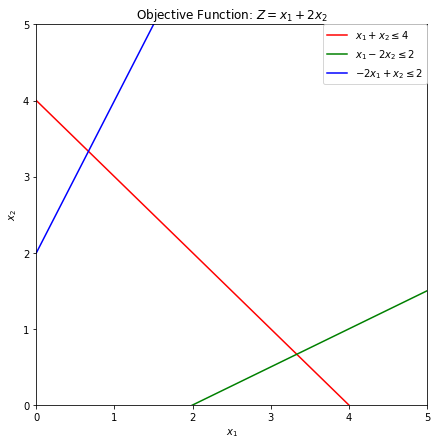

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from sympy.solvers import solve
from sympy import Symbol

## Set graph image size
gSize=7
plt.figure(figsize=(gSize,gSize))

## Set axis bounds and labels
gLim=5
plt.xlim((0, gLim)) #set x-axis bounds
plt.ylim((0, gLim)) #set y-axis bounds
plt.xlabel(r'$x_1$') #set x-axis label
plt.ylabel(r'$x_2$') #set y-axis label

plt.title("Objective Function: "r'$Z=x_1+2x_2$') #set chart title

## Make arrays of x1 and x2 values
x1Vals = np.linspace(0, gLim, 2000)
x2Vals = np.linspace(0, gLim, 2000)

## Define constraint functions
# x1 + x2 <= 4
def c1(x1):
    return 4-x1
# x1 - 2x2 <= 2
def c2(x1):
    return (2-x1)*(-0.5)
# -2x1 + x2 <= 2
def c3(x1):
    return 2+2*x1
# Define Objective Function
def z(x1, x2):
    return x1+2*x2

## Create an array of x2 values for each constraint
x2_c1 = c1(x1Vals)
x2_c2 = c2(x1Vals)
x2_c3 = c3(x1Vals)

## Plot each constraint line
plt.plot(x1Vals, x2_c1, label=r'$x_1+x_2\leq4$', c='r')
plt.plot(x1Vals, x2_c2, label=r'$x_1-2x_2\leq2$', c='g')
plt.plot(x1Vals, x2_c3, label=r'$-2x_1+x_2\leq2$', c='b')

# Plot a legend
plt.legend(loc=3) #move plot legend
plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0.) #format plot legend

sys.exit()

## Find Corner Feasible Points
# Solve x1 value for each intersection
x1 = Symbol('x1')
cfs1 =  0
cfs2 =  0
cfs3, =  solve(f1(x1)-f3(x1))
cfs4, =  solve(f1(x1)-f2(x1))
cfs5, =  solve(f2(x1)-0)
# Solve x2 value for each intersection
y1 = 0
y2 = f3(cfs2)
y3 = f1(cfs3)
y4 = f1(cfs4)
y5 = f2(cfs5)
# Solve Z value for each CFS
z1 = z(cfs1, y1)
z2 = z(cfs2, y2)
z3 = z(cfs3, y3)
z4 = z(cfs4, y4)
z5 = z(cfs5, y5)


# Plot each CFS
plt.plot(cfs1, y1,'go',markersize=10)
plt.plot(cfs2, y2,'go',markersize=10)
plt.plot(cfs3, y3,'go',markersize=10)
plt.plot(cfs4, y4,'go',markersize=10)
plt.plot(cfs5, y5,'go',markersize=10)

# Label each CFS
offset=0.05 # set label offset
bbox = dict(boxstyle ="round", fc ="0.8") # set label style
plt.annotate('(%.2f, %.2f)\nZ=%.2f'%(cfs1, y1, z1), (cfs1+offset, y1+offset), bbox=bbox)
plt.annotate('(%.2f, %.2f)\nZ=%.2f'%(cfs2, y2, z2), (cfs2+offset, y2+offset), bbox=bbox)
plt.annotate('(%.2f, %.2f)\nZ=%.2f'%(cfs3, y3, z3), (cfs3+offset, y3+offset), bbox=bbox)
plt.annotate('(%.2f, %.2f)\nZ=%.2f'%(cfs4, y4, z4), (cfs4+offset, y4+offset), bbox=bbox)
plt.annotate('(%.2f, %.2f)\nZ=%.2f'%(cfs5, y5, z5), (cfs5+offset, y5+offset), bbox=bbox)

# Shade Feasible Region
plt.fill([cfs1,cfs2,cfs3,cfs4,cfs5,cfs1],[y1,y2,y3,y4,y5,y1],'green',alpha=0.2)

# Draw Objective Function Contours
X1,X2 = np.meshgrid(x1Vals,x2Vals) # Make arrays of all (x1,x2) values
CS = plt.contour(x1Vals, x2Vals, z(X1, X2), colors='k',linestyles='dashed') #plot objective function contours
plt.clabel(CS, inline=1, fontsize=10, fmt='%1.0f') #format contour labels


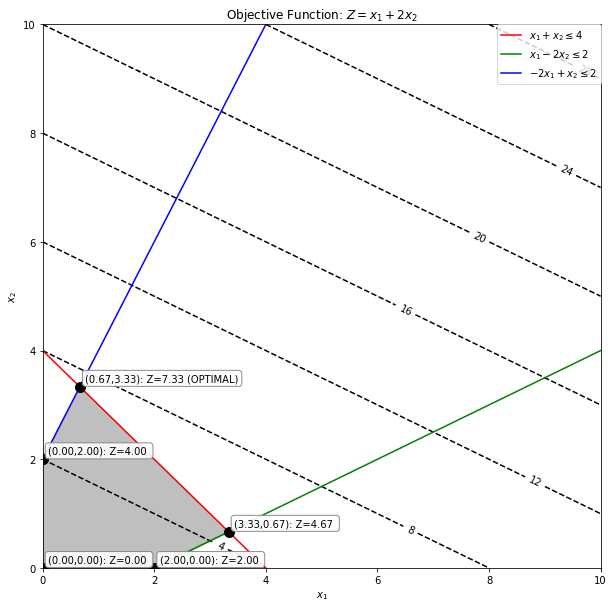

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import sys

#set size of graph
plt.figure(figsize=(10,10))

# x1 >= 0
x1 = np.linspace(0, 10, 2000)
# x2 >= 0
x2 = np.linspace(0, 10, 2000)
# z >= 0; used for objective function contours
Z = np.linspace(0, 10, 2000)

## Creating a different equation for each of the constraints and solving each for x2
# x1 + x2 <= 4
x2a = -x1 + 4

# x1 - 2x2 <= 2
x2b = 1/2*x1 - 1

# -2x1 + x2 <= 2
x2c = 2*x1 + 2

#define objective function
X1,X2 = np.meshgrid(x1,x2) #define 2D array of values to graph objective function
Z = 1*X1 + 2*X2 #actual objective function

# Make plot
plt.plot(x1, x2a, label=r'$x_1+x_2\leq4$', c='r') #plot constraint
plt.plot(x1, x2b, label=r'$x_1-2x_2\leq2$', c='g') #plot constraint
plt.plot(x1, x2c, label=r'$-2x_1+x_2\leq2$', c='b') #plot constraint

plt.xlim((0, 10)) #set x-axis bounds
plt.ylim((0, 10)) #set y-axis bounds
plt.xlabel(r'$x_1$') #set x-axis label
plt.ylabel(r'$x_2$') #set y-axis label


#plot objective function contours
CS = plt.contour(x1,x2,Z, colors='k',linestyles='dashed') #plot objective function contours
plt.clabel(CS, inline=1, fontsize=10, fmt='%1.0f') #format contour labels
plt.title("Objective Function: "r'$Z=x_1+2x_2$') #set chart title

# Fill feasible region
x2e = np.minimum(x2a, x2c) #define a function that finds minimum of constraints
plt.fill_between(x1, x2e, x2b, where=(x1<=10/3), color='grey', alpha=0.5) #fill in area between minimum of constraints and x-axis


# Plot a legend
plt.legend(loc=3) #move plot legend
plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0.) #format plot legend

#plot points for simplex path
X1=[0,2/3,10/3,0,2] #list of x-axis values for points of interest
X2=[0,10/3,2/3,2,0] #list of y-axis values for points of interest
labels = ['','(OPTIMAL)','','',''] #list of labels for pointe of interest
plt.plot(X1,X2,'ko',markersize=10) #plot points of interest
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9) #define label format for points of interest
for i in range(0,len(X1)): #graph labels for points of interest
    plt.annotate("("+str("{:.2f}".format(X1[i]))+","+str("{:.2f}".format(X2[i]))+"): Z="+
                 str("{:.2f}".format(1*X1[i]+2*X2[i]))+" "+labels[i], (X1[i]+.1, X2[i]+.1),bbox=bbox_props)